In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
from PIL import Image


Using scipy.ndimage.imread('img.jpg', mode='RGB'), the resulting array will always have this order: (H, W, D) 
i.e. (height, width, depth) because of the terminology that numpy uses for ndarrays (axis=0, axis=1, axis=2) 
or analogously (Y, X, Z) if one would like to visualize in 3 dimensions

This a is: <class 'numpy.ndarray'> with dimensions: (2, 2, 3)
[[[255   0   0]
  [  0 255   0]]

 [[  0   0 255]
  [255 255 255]]]


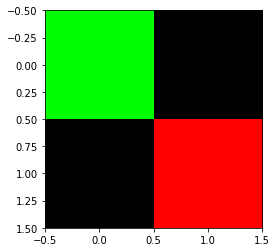

In [2]:
## Create a simple image from array. Take a simple example of 2 * 2 color image 

a = np.random.randint(0, 256, size=(2, 2, 3))  # 3 represents RGB channels 
a[0][0] = [255,0,0]
a[0][1] = [0,255,0]
a[1][0] = [0,0,255]
a[1][1] = [255,255,255]

print('This a is:', type(a), 'with dimensions:', a.shape)

print(a)

## Convert this array into img 
img = Image.fromarray((a * 255).astype('uint16'), mode='RGB')
##cv2.imshow("image", a);
plt.imshow(img) 



In [3]:

print (a[0][0]) # Pixel value (RGB value) at 0th Row and 0th Column 
print (a[0][1]) # Pixel value (RGB value) at 0th Row and 1st Column 
print (a[1][0]) # Pixel value (RGB value) at 1st Row and 0th Column 
print (a[1][1]) # Pixel value (RGB value) at 1nd Row and 1st Column 


[255   0   0]
[  0 255   0]
[  0   0 255]
[255 255 255]


In [4]:

# It is easy to assign values to these pixels 
##a[0][0] = 0 # Assign all the channels R G B to 0 
a[0][0] = [0,255,0] # i.e RGB values are 0,256, 0 respectively 

print (a[0][0]) # Pixel value (RGB value) at 0th Row and 0th Column 
print (a[0][1]) # Pixel value (RGB value) at 0th Row and 1st Column 
print (a[1][0]) # Pixel value (RGB value) at 1st Row and 0th Column 
print (a[1][1]) # Pixel value (RGB value) at 1nd Row and 1st Column 

## Verify that a[0][0] value has changed
## Print a, and notice how it has printed as if it is 2 dimensional with the value () 
print (a) 

[  0 255   0]
[  0 255   0]
[  0   0 255]
[255 255 255]
[[[  0 255   0]
  [  0 255   0]]

 [[  0   0 255]
  [255 255 255]]]


This thresholds is: <class 'numpy.ndarray'> with dimensions: (2, 2)
[[ True  True]
 [ True False]]
This thresholds is: <class 'numpy.ndarray'> with dimensions: (2, 2, 3)
[[[255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]]]


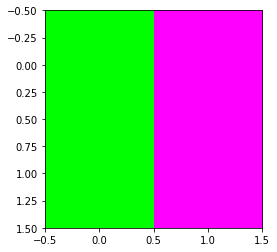

In [5]:
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Identify pixels below the threshold
thresholds = (a[:,:,0] < rgb_threshold[0]) \
            | (a[:,:,1] < rgb_threshold[1]) \
            | (a[:,:,2] < rgb_threshold[2])

print('This thresholds is:', type(thresholds), 'with dimensions:', thresholds.shape)
print(thresholds)


# Copy the image 
b = a.copy()
## Apply the new values at the threshold
# b[thresholds] = 0  ## Try changing differrent numbers 
b[thresholds] = [255,255,255] ## Try changing differrent numbers 
## Notice that the pixel values changes wherever thresholds are true

## Explanation of 3 dim array and applying it with 2 dimensional array 


print('This thresholds is:', type(b), 'with dimensions:', b.shape)
print(b)

img2 = Image.fromarray((b * 255).astype('uint16'), mode='RGB')
plt.imshow(img2) 
